 ### 1.Import the necessary packages

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import statsmodels.api as sm



### 2: Load Dataset:

In [9]:
diabetes=load_diabetes()
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### 3.Add target
The target variable (also called the dependent variable, y, or label) is what you are trying to predict.
Without the Target,You can’t train a regression model.

In [10]:

df['target']=diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### 4.Split the x and y by creating the feature variables

In [11]:

#axis=1 specifies that you're dropping a column (not a row).
x=df.drop('target',axis=1)
y=df['target']
print(x,y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### 5.Split the data into testing and training
Training Set: Used to teach the model (usually 70–80% of data)

Testing Set: Used to evaluate the model’s performance on new, unseen data  (20–30%)

In [12]:

#test size 80% goes to traininig and 20% goes to  test
#random_state to make it random and uniform

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#we print the shape  of traing and testing
print('training set shape:',x_train.shape,y_train.shape)
print('testing set shape:',x_test.shape,y_test.shape)

training set shape: (353, 10) (353,)
testing set shape: (89, 10) (89,)


### 6.Create linear Regression(LR) model
to predict values and to understand relationships

In [13]:

lr=LinearRegression()
lr

LinearRegression()

In [14]:
model = LinearRegression()
model

LinearRegression()

### 7.Train the model on training set
Training a model = teaching it to find patterns in the data.

It looks at the features (X_train) and learns to predict the target (y_train).

In [15]:
#this is how the model learns
lr.fit(x_train,y_train) 

LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

### 8.Make predictions on the test data set.
See how the model handles new data

Evaluate performance by Calculating  accuracy and error metrics


In [17]:
#predict on the training set
#preds are predicted values of the target variables based on the features(x-test)
#once we have the preds we can compare them with the actual values of the target variables 
#to evaluate the performance of the model

y_pred=lr.predict(x_test)
y_pred.shape

(89,)

In [18]:
predictions = model.predict(x_test)
predictions.shape

(89,)

### 9.Evaluate the model with metrics.
You compare y_pred (predicted values) to y_test (actual values) 
using metrics to measure the model’s accuracy, error, or quality.

In [19]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [20]:
#evaluate the performance of the model
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
intercept = lr.intercept_

#r2=variance of the dependent variable(target) explained by the independent variable(features)
#(coefficient of determination) tells you how much of the variation in the actual data is explained by your model’s predictions.
#A score of:
 #1.0 → Perfect prediction(positive correlation)The points would form a tight cloud along a straight diagonal line 
  #0.0 → No predictive power
  #0.45 → Your model explains 45% of the variance in the target.The points are scattered more loosely around the diagonal.


print("r2 score:",r2) 

#MSE its the average squared distance b2in the predicted and the actual value
print("Mean Squared Error:",mse)

#MAE  its the average absoluute distance b2in the predicted and the actual value
print("Mean Absolute Error:",mae)

#intercept is the starting point of  the regression line on the y -axis(dependent,target)
#when the x-axis(feature) is 0
#i the feature is positive the target increases and vice-versa
print("Intercept:",intercept)

r2 score: 0.4526027629719197
Mean Squared Error: 2900.1936284934804
Mean Absolute Error: 42.79409467959992
Intercept: 151.34560453985995


###### From evaluating our model, we can confidently say that the accuracy of our model is 45.26% because the the model captures some patterns but is missing a lot.




### 10.Plot the predicted vs actual values

In [21]:
results_df = pd.DataFrame({'Actual': y_test.values,'Predicted': y_pred})
results_df

,Actual,Predicted
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
...,...,...
84,153.0,115.011800
85,98.0,78.955842
86,37.0,81.560873
87,63.0,54.379973


In [25]:
results_df.describe()

,Actual,Predicted
count,89.000000,89.000000
mean,145.775281,141.862441
std,73.200806,54.346521
min,37.000000,47.990466
25%,89.000000,100.129259
50%,129.000000,144.810309
75%,202.000000,181.337321
max,310.000000,291.417029


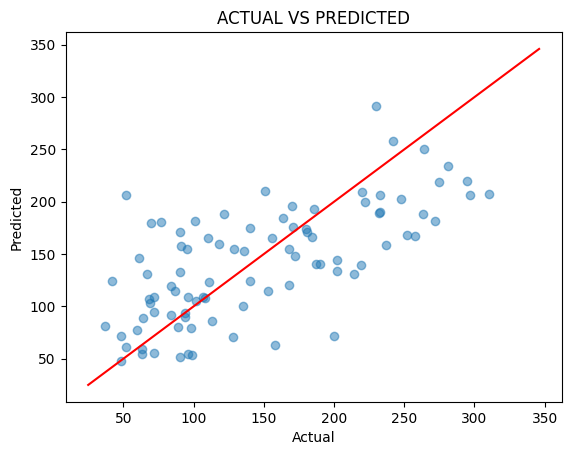

In [22]:

#the predicted are plotted on the x-axis and actual values on the y-axis
#if the model is a good fit it should be close to diagonal line indicating strong linear r/ship b2in the actual and pedicted.


plt.scatter(y_test,y_pred,alpha=0.5)  #alpha used to make the dots more visible
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')

#y.min() and y.max(): These return the minimum and maximum values of the variable y.
#[y.min(), y.max()]: This creates a list with two points — the lowest and highest value of y.

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ACTUAL VS PREDICTED')
plt.show()

Points lie close to a 45° diagonal line (y = x).This means predictions are accurate and match the real data.
The model has some ability to predict, but a large amount of the true variation is not being captured.



### 11.plot the residuals vs predicted values

In [28]:
residuals = y_test - y_pred
residuals_df = pd.DataFrame({'Actual': y_test.values,'Predicted': y_pred,'Residual': residuals})
residuals_df

,Actual,Predicted,Residual
287,219.0,139.547558,79.452442
211,70.0,179.517208,-109.517208
72,202.0,134.038756,67.961244
321,230.0,291.417029,-61.417029
73,111.0,123.789659,-12.789659
...,...,...,...
255,153.0,115.011800,37.988200
90,98.0,78.955842,19.044158
57,37.0,81.560873,-44.560873
391,63.0,54.379973,8.620027


In [32]:
residuals_df.describe()

,Actual,Predicted,Residual
count,89.000000,89.000000,89.000000
mean,145.775281,141.862441,3.912840
std,73.200806,54.346521,54.015424
min,37.000000,47.990466,-154.493375
25%,89.000000,100.129259,-27.967322
50%,129.000000,144.810309,3.775887
75%,202.000000,181.337321,43.040858
max,310.000000,291.417029,128.333274


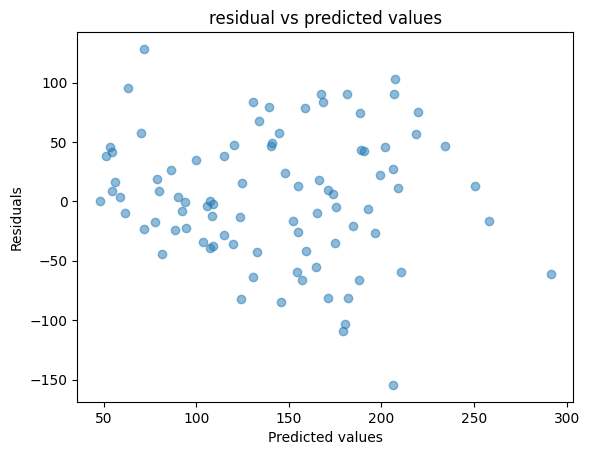

In [26]:
#residuals are plotted against the predicted values of the target variable

#if the the LR is a good fit of data  it should  show a random scatter of the points  around zero with no disceranble trends

plt.scatter(y_pred,y_test-y_pred , alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("residual vs predicted values")
plt.show()


# METHODS TO IMPROVE OUR MODEL
1.Data Quality & Quantity i.e clean data,dropping irrelevant features(independent columns)

2.Try Better Algorithms
   -Decision Tree Regressor	Captures non-linear patterns and feature interactions
   -Random Forest	More robust, handles noise, and reduces overfitting
